In [352]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk
import re

from pathlib import Path

%matplotlib inline

In [353]:
RESULTS_DIR_PATH = Path("/nfs/homedirs/grafberg/pycharm_project4/graph/results/")
RESULTS_DATE_FOLDER = Path("2019-07-09_23-20-37")
METRICS = ['test_auc',
'test_ap',
'naive_precision',
'naive_recall',
'naive_time',
'naive_size',
'lsh_precision',
'lsh_recall',
'lsh_time',
'lsh_size',
'compare_precision',
'compare_recall']

In [354]:
def parse_filename(filename: str):
    """
    Extracts Results Meta-Information from filename
    """
    # Check if is indeed pickle file
    assert filename.endswith('.pkl')
    filename = filename[:-4] # Remove .pkl
    
    # Retrieve individual attributes
    attributes = filename.split("_")[1:] # Split and remove 'GS'
    assert len(attributes) == 4 
    
    params = {
        'dataset': attributes[0],
        'dist_metric': attributes[1],
        'bands': int(attributes[2]),
        'rows': int(attributes[3])
    }
    
    return params
    

def extract_experiment_results(path: Path):
    """
    path: Folder containing individual .pkl files with experiment results
    
    """
    experiments = []
    
    for file in path.glob('*.pkl'):
        meta_inf = parse_filename(file.parts[-1])
        with file.open('rb') as f:     
            results = pk.load(file.open('rb'))
            
            for metric in METRICS:
                try:
                    meta_inf[metric] = results[metric]  
                except KeyError as e:
                    print(f"Metric {metric} not found in saved results from experiment {file.parts[-1]}")
        
        experiments.append(meta_inf)
    
    cols = ['dataset', 'bands', 'rows'] + [m for m in METRICS if m in results]
    return pd.DataFrame(experiments)[cols]

In [355]:
df = extract_experiment_results(RESULTS_DIR_PATH / RESULTS_DATE_FOLDER)
df.to_csv(RESULTS_DIR_PATH / RESULTS_DATE_FOLDER / 'results.csv') # Save df to csv file

In [356]:
df

,dataset,bands,rows,test_auc,test_ap,naive_precision,naive_recall,naive_time,naive_size,lsh_precision,lsh_recall,lsh_time,lsh_size,compare_precision,compare_recall
0,CiteSeer,8,32,0.934399,0.929051,0.043207,0.409166,0.000183,44.275716,0.045189,0.407979,111.898740,0.304144,1.000000,0.953370
1,CiteSeer,8,128,0.929182,0.919659,0.042278,0.402042,0.000231,44.275716,0.059150,0.244479,10.535313,0.139240,1.000000,0.434641
2,Cora,32,32,0.946696,0.941264,0.137796,0.383166,0.000153,29.333056,0.153028,0.382961,92.279153,0.097760,1.000000,0.899985
3,Cora,8,128,0.925769,0.916201,0.138600,0.379582,0.000202,29.333056,0.308840,0.112328,2.637145,0.014208,1.000000,0.132805
4,Cora,48,64,0.936287,0.935617,0.141712,0.385726,0.000179,29.333056,0.160402,0.377534,33.197445,0.091944,0.999913,0.864645
5,Cora,8,32,0.914922,0.902102,0.039551,0.400471,0.000078,29.333056,0.865517,0.025701,21.050827,0.001160,0.317241,0.000930
6,Cora,2,64,0.937295,0.933236,0.132825,0.365452,0.000199,29.333056,0.255997,0.120213,0.987067,0.018344,1.000000,0.170674
7,Cora,2,196,0.923872,0.927284,0.136699,0.391255,0.001345,29.333056,0.677536,0.038296,0.518591,0.002208,1.000000,0.019748
8,CiteSeer,4,64,0.923497,0.913705,0.042510,0.404417,0.000175,44.275716,0.052786,0.294229,13.334894,0.187776,1.000000,0.585899
9,Cora,8,4,0.943636,0.936688,0.135329,0.372619,0.000184,29.333056,0.150484,0.372619,812.580018,0.096728,1.000000,0.899293


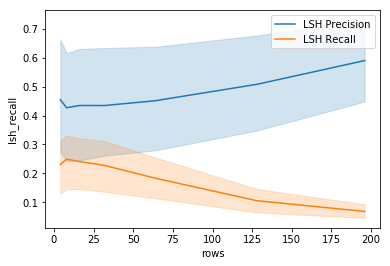

In [357]:
# Plot influence of number of rows in signature matrix on performance
sns.lineplot(x='rows', y='lsh_precision', data=df, label='LSH Precision')
sns.lineplot(x='rows', y='lsh_recall', data=df, label='LSH Recall')
plt.legend()

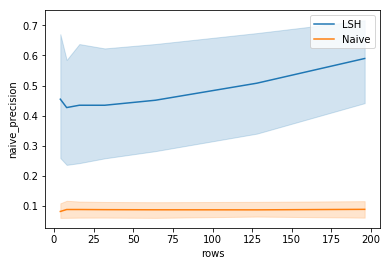

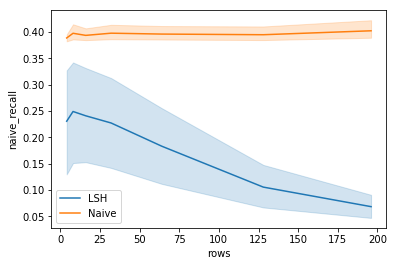

In [358]:
# Compare Precision of LSH vs Naive
sns.lineplot(x='rows', y='lsh_precision', data=df, label='LSH')
sns.lineplot(x='rows', y='naive_precision', data=df, label='Naive')
plt.figure()
sns.lineplot(x='rows', y='lsh_recall', data=df, label='LSH')
sns.lineplot(x='rows', y='naive_recall', data=df, label='Naive')

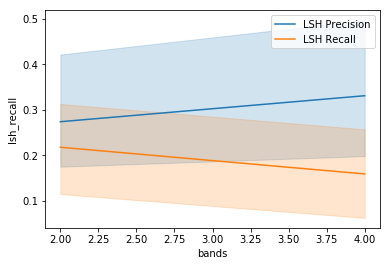

In [345]:
# Same for number of bands 
sns.lineplot(x='bands', y='lsh_precision', data=df, label='LSH Precision')
sns.lineplot(x='bands', y='lsh_recall', data=df, label='LSH Recall')
plt.legend()

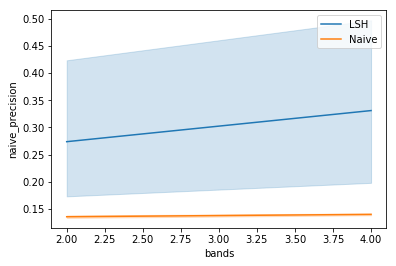

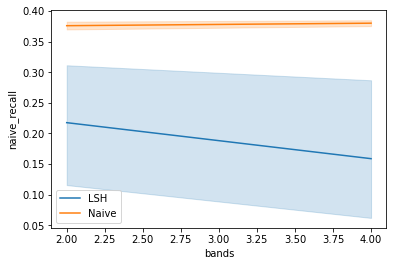

In [346]:
# Compare Precision of LSH vs Naive
sns.lineplot(x='bands', y='lsh_precision', data=df, label='LSH')
sns.lineplot(x='bands', y='naive_precision', data=df, label='Naive')
plt.figure()
sns.lineplot(x='bands', y='lsh_recall', data=df, label='LSH')
sns.lineplot(x='bands', y='naive_recall', data=df, label='Naive')

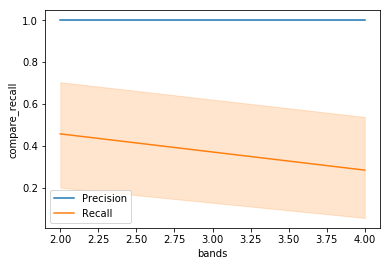

In [347]:
# Plot influence of number of bands on precision/ recall of naive matrix
sns.lineplot(x='bands', y='compare_precision', data=df, label='Precision')
sns.lineplot(x='bands', y='compare_recall', data=df, label='Recall')
plt.legend()

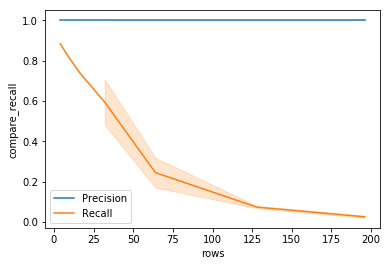

In [348]:
# Plot influence of number of rows on precision/ recall of naive matrix
sns.lineplot(x='rows', y='compare_precision', data=df, label='Precision')
sns.lineplot(x='rows', y='compare_recall', data=df, label='Recall')
plt.legend()

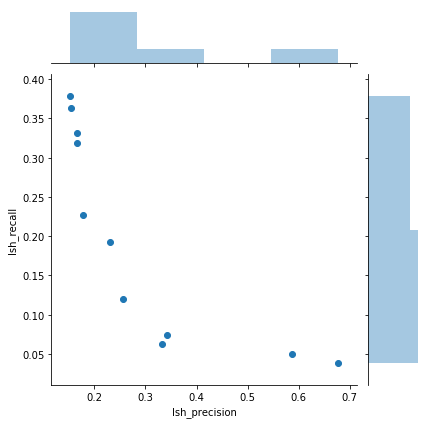

In [349]:
sns.jointplot(x='lsh_precision', y='lsh_recall', data=df)

# Time and Memory

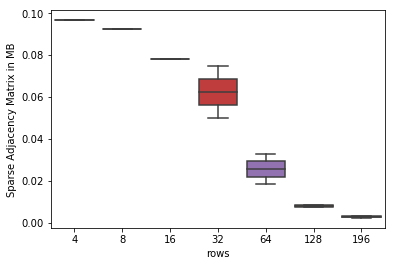

<Figure size 432x288 with 0 Axes>

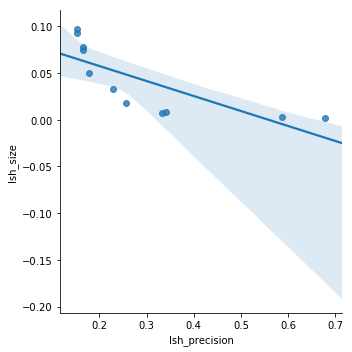

In [350]:
# Plot average sizes of sparse adjacency matrices
ax = sns.boxplot(x='rows', y='lsh_size', data=df)
ax.set_ylabel("Sparse Adjacency Matrix in MB")
plt.figure()
sns.lmplot(x='lsh_precision', y='lsh_size', data=df)

Text(0, 0.5, 'Adjacency Matrix in MB')

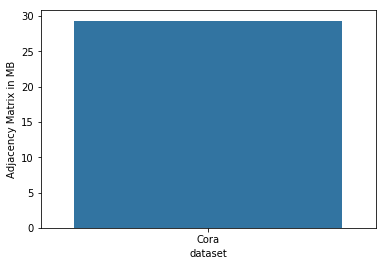

In [351]:
ax = sns.barplot(x='dataset', y='naive_size', data=df)
ax.set_ylabel("Adjacency Matrix in MB")

Text(0.5, 0, 'Sparse Adjacency Matrix in MB')

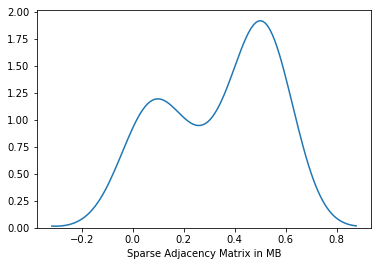

In [299]:
ax = sns.distplot(df['lsh_size'], hist=False)
ax.set_xlabel("Sparse Adjacency Matrix in MB")

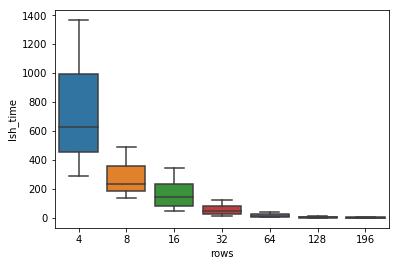

<Figure size 432x288 with 0 Axes>

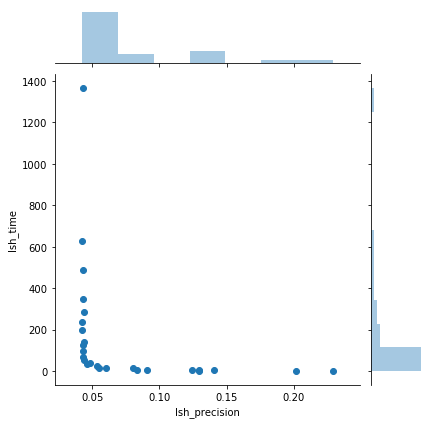

In [300]:
# Plot average distributions of adjacency matrix sizes and memory consumption
sns.boxplot(x='rows', y='lsh_time', data=df)
plt.figure()
sns.jointplot(x='lsh_precision', y='lsh_time', data=df)

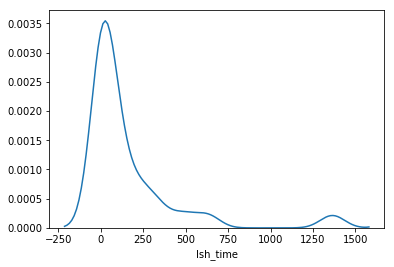

In [301]:
sns.distplot(df['lsh_time'], hist=False)